In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X = df.drop(columns=['math score'], axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [11]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns
num_features, cat_features

(Index(['reading score', 'writing score'], dtype='object'),
 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
        'test preparation course'],
       dtype='object'))

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ('OneHotEncoder', cat_transformer, cat_features),
    ('StdScaler', num_transformer, num_features)
])

In [13]:
X = preprocessor.fit_transform(X)

In [14]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=69)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [16]:
def evalutae_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):

    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae, train_rmse, train_r2 = evalutae_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evalutae_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set")
    print(" - RMSE : {:.4f}".format(train_rmse))
    print(" - MAE : {:.4f}".format(train_mae))
    print(" - R2 Score : {:.4f}".format(train_r2))
    
    print("-----------------------------------------")

    print("Model performance for test set")
    print(" - RMSE : {:.4f}".format(test_rmse))
    print(" - MAE : {:.4f}".format(test_mae))
    print(" - R2 Score : {:.4f}".format(test_r2))

    r2_list.append(test_r2)
    print('='*35)
    print('\n')

Linear Regression
Model performance for training set
 - RMSE : 5.3458
 - MAE : 4.2520
 - R2 Score : 0.8753
-----------------------------------------
Model performance for test set
 - RMSE : 5.3491
 - MAE : 4.2725
 - R2 Score : 0.8765


Lasso
Model performance for training set
 - RMSE : 6.5270
 - MAE : 5.1710
 - R2 Score : 0.8141
-----------------------------------------
Model performance for test set
 - RMSE : 6.7611
 - MAE : 5.2661
 - R2 Score : 0.8026


Ridge
Model performance for training set
 - RMSE : 5.3326
 - MAE : 4.2477
 - R2 Score : 0.8759
-----------------------------------------
Model performance for test set
 - RMSE : 5.3368
 - MAE : 4.2671
 - R2 Score : 0.8770


K-Neighbors Regressor
Model performance for training set
 - RMSE : 5.9397
 - MAE : 4.7090
 - R2 Score : 0.8461
-----------------------------------------
Model performance for test set
 - RMSE : 6.9629
 - MAE : 5.4350
 - R2 Score : 0.7907


Decision Tree
Model performance for training set
 - RMSE : 0.4507
 - MAE : 0

In [23]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['model name', 'r2 score']).sort_values(by=['r2 score'], ascending=False)

,model name,r2 score
2,Ridge,0.877032
0,Linear Regression,0.876467
7,CatBoosting Regressor,0.860007
5,Random Forest Regressor,0.842045
8,AdaBoost Regressor,0.829388
6,XGBRegressor,0.818573
1,Lasso,0.802639
3,K-Neighbors Regressor,0.790682
4,Decision Tree,0.743392


In [32]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.65


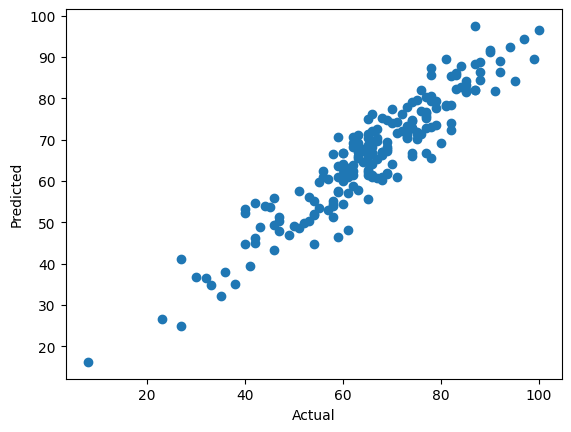

In [33]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


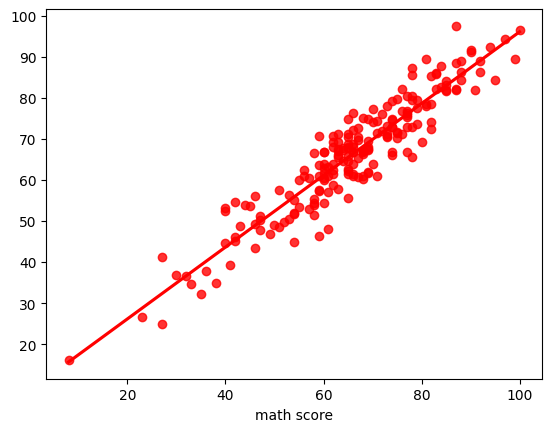

In [34]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [35]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
823,71,74.250,-3.250
999,77,75.750,1.250
891,85,84.125,0.875
781,77,76.375,0.625
967,63,67.625,-4.625
...,...,...,...
744,55,53.500,1.500
800,67,72.625,-5.625
159,66,66.750,-0.750
316,77,75.250,1.750
